<a href="https://colab.research.google.com/github/kimiafa/Network/blob/main/BandpassFilter_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<div dir="rtl" style="text-align: right;">

# پروژه درس ازمایشگاه مدارهای مخابراتی
# طراحی و شبیه‌سازی فیلتر میان‌گذر RLC
# نام دانشجو: کیمیا فاریابی
# شماره دانشجویی: 40112340119195

# ======================================================
<div dir="rtl" style="text-align: right;">

## 1. مقدمه پروژه
## در این پروژه یک فیلتر میان‌گذر RLC بررسی می‌شود.
## هدف، تحلیل پاسخ فرکانسی و زمانی فیلتر و بررسی اثر پارامترهاست.
# ------------------------------------------------------------
<div

<div dir="rtl" style="text-align: right;">


# 2. مبانی تئوری فیلتر میان‌گذر RLC

##مدار RLC سری شامل یک مقاومت (R)، یک سلف (L) و یک خازن (C) است.
##در این پروژه، خروجی مدار از روی مقاومت گرفته شده که باعث ایجاد رفتار میان‌گذر می‌شود.

##فرکانس تشدید مدار RLC از رابطه زیر به دست می‌آید:

##f0 = 1 / (2π√(LC))

##در این فرکانس، دامنه پاسخ فیلتر بیشینه است.


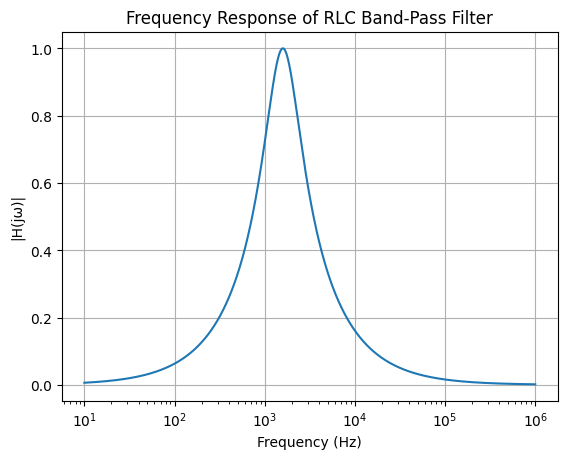

Resonant Frequency (Hz): 1591.5494309189535


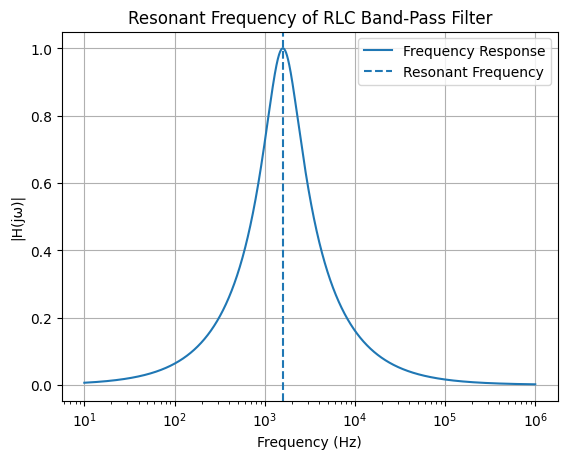

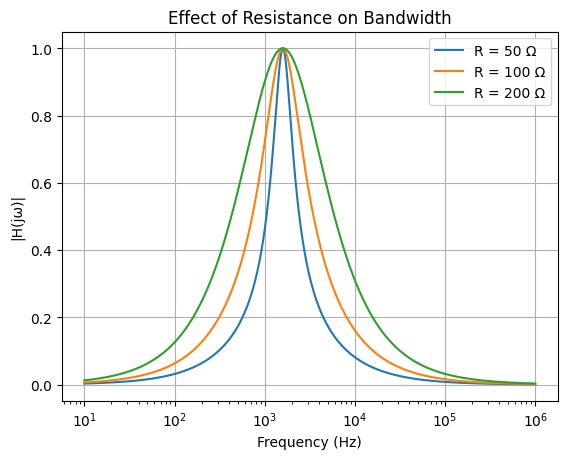

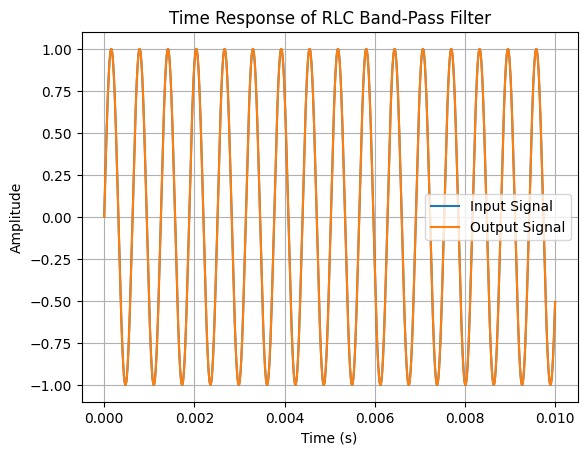

In [2]:


# ------------------------------------------------------------
# 2. کتابخانه‌های مورد نیاز
# ------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# 3. تعریف پارامترهای مدار RLC
# ------------------------------------------------------------
R = 100        # مقاومت (Ohm)
L = 10e-3      # سلف (Henry)
C = 1e-6       # خازن (Farad)

# ------------------------------------------------------------
# 4. تعریف بازه فرکانسی
# ------------------------------------------------------------
f = np.logspace(1, 6, 3000)   # 10 Hz تا 1 MHz
w = 2 * np.pi * f

# ------------------------------------------------------------
# 5. محاسبه تابع انتقال فیلتر میان‌گذر
# خروجی روی مقاومت در نظر گرفته شده است
# ------------------------------------------------------------
Z = R + 1j * (w * L - 1 / (w * C))   # امپدانس کل
H = R / Z                           # تابع انتقال
H_mag = np.abs(H)                   # دامنه پاسخ فرکانسی

# ------------------------------------------------------------
# 6. رسم پاسخ فرکانسی فیلتر
# ------------------------------------------------------------
plt.figure()
plt.semilogx(f, H_mag)
plt.xlabel("Frequency (Hz)")
plt.ylabel("|H(jω)|")
plt.title("Frequency Response of RLC Band-Pass Filter")
plt.grid(True)
plt.show()

# نتیجه:
# فیلتر فقط در یک بازه مشخص از فرکانس‌ها عبور مناسبی دارد.

# ------------------------------------------------------------
# 7. محاسبه فرکانس تشدید
# ------------------------------------------------------------
f0 = 1 / (2 * np.pi * np.sqrt(L * C))
print("Resonant Frequency (Hz):", f0)

# ------------------------------------------------------------
# 8. رسم پاسخ فرکانسی همراه با فرکانس تشدید
# ------------------------------------------------------------
plt.figure()
plt.semilogx(f, H_mag, label="Frequency Response")
plt.axvline(f0, linestyle="--", label="Resonant Frequency")
plt.xlabel("Frequency (Hz)")
plt.ylabel("|H(jω)|")
plt.title("Resonant Frequency of RLC Band-Pass Filter")
plt.legend()
plt.grid(True)
plt.show()

# نتیجه:
# فرکانس تشدید محاسبه‌شده با بیشینه پاسخ فرکانسی منطبق است.

# ------------------------------------------------------------
# 9. بررسی تأثیر مقاومت بر پهنای باند
# ------------------------------------------------------------
R_values = [50, 100, 200]

plt.figure()
for R_val in R_values:
    Z = R_val + 1j * (w * L - 1 / (w * C))
    H = R_val / Z
    plt.semilogx(f, np.abs(H), label=f"R = {R_val} Ω")

plt.xlabel("Frequency (Hz)")
plt.ylabel("|H(jω)|")
plt.title("Effect of Resistance on Bandwidth")
plt.legend()
plt.grid(True)
plt.show()

# نتیجه:
# با افزایش مقاومت، پهنای باند افزایش و بهره بیشینه کاهش می‌یابد.

# ------------------------------------------------------------
# 10. بررسی پاسخ زمانی فیلتر
# ------------------------------------------------------------
t = np.linspace(0, 0.01, 5000)
input_signal = np.sin(2 * np.pi * f0 * t)

gain_f0 = np.abs(R / (R + 1j * (2*np.pi*f0*L - 1/(2*np.pi*f0*C))))
output_signal = gain_f0 * input_signal

plt.figure()
plt.plot(t, input_signal, label="Input Signal")
plt.plot(t, output_signal, label="Output Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Time Response of RLC Band-Pass Filter")
plt.legend()
plt.grid(True)
plt.show()



<div dir="rtl" style="text-align: right;">

# نتیجه:
## سیگنال با فرکانس نزدیک به تشدید، بدون تضعیف شدید عبور می‌کند.
## فیلتر میان‌گذر RLC طراحی‌شده قادر است باند فرکانسی مشخصی
## را انتخاب کند. نتایج شبیه‌سازی با تئوری مدارهای مخابراتی
## مطابقت کامل دارند.

## نتیجه‌گیری نهایی

در این پروژه، یک فیلتر میان‌گذر RLC به‌صورت گام‌به‌گام طراحی و
در محیط Google Colab شبیه‌سازی شد. ابتدا با استفاده از روابط تئوری
مدار RLC، رفتار کلی فیلتر مورد بررسی قرار گرفت و سپس پاسخ فرکانسی
آن به روش عددی محاسبه و ترسیم شد.

نتایج پاسخ فرکانسی نشان داد که مدار تنها در بازه مشخصی از فرکانس‌ها
دارای بهره بالا بوده و سیگنال‌های خارج از این بازه به‌طور مؤثری
تضعیف می‌شوند. فرکانس تشدید محاسبه‌شده از رابطه تئوری با بیشینه
پاسخ فرکانسی شبیه‌سازی‌شده تطابق مناسبی داشت که این موضوع
صحت مدل‌سازی انجام‌شده را تأیید می‌کند.

همچنین با بررسی تأثیر مقدار مقاومت، مشاهده شد که افزایش مقاومت
باعث افزایش پهنای باند فیلتر می‌شود. این رفتار
کاملاً با مبانی تئوری فیلترهای RLC سازگار بوده و نشان می‌دهد که
انتخاب صحیح پارامترهای مدار نقش مهمی در طراحی فیلترهای مخابراتی دارد.

در بخش پاسخ زمانی نیز مشخص شد که فیلتر میان‌گذر، سیگنال‌هایی با
فرکانس نزدیک به فرکانس تشدید را با کمترین تضعیف عبور می‌دهد،
در حالی که سیگنال‌های با فرکانس‌های دورتر به میزان قابل توجهی
کاهش می‌یابند.

در مجموع، نتایج این پروژه نشان می‌دهد که فیلتر میان‌گذر RLC
می‌تواند به‌عنوان یک بلوک اساسی در گیرنده‌های مخابراتی برای
انتخاب کانال، کاهش نویز و بهبود کیفیت سیگنال دریافتی مورد استفاده
قرار گیرد.
